# Predicting Coronavirus Outbreak and Recovering Rate with SKLEARN
## Group-Bhavya Ratnani,Sanjay Chandwani
### Project Report
This project is on the given data sets
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
The given datasets were combined together and used
After trying out many things like prophet(suggested by Karuna ma'am in doubt lecture)(giving error "Microsoft Visual C++ 14.0 is required"),mlr even after installing it was still not working for me so decided to use sklearn even though error rate was high it was comparitevly eary to understand and use
By taking guidelines from lecture 3 made the model


In [1]:
confirmed_cases = r"C:\Users\USER\Desktop\ATSCORONAproj\time_series_covid19_confirmed_global.csv"
recovered_cases =r"C:\Users\USER\Desktop\ATSCORONAproj\time_series_covid19_recovered_global.csv"
death_cases = r"C:\Users\USER\Desktop\ATSCORONAproj\time_series_covid19_deaths_global.csv"

In [2]:
def getdata(data_url,case_type):
    df = pd.read_csv(data_url)
    melted_df = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
    melted_df.rename(columns={"variable":"Date","value":case_type},inplace=True)
    return melted_df

def merge_data(confirm_df,recovered_df,deaths_df):
	new_df = confirm_df.join(recovered_df['Recovered']).join(deaths_df['Deaths'])
	return new_df

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
confirm_df = getdata(confirmed_cases,"Confirmed")
recovered_df = getdata(recovered_cases,"Recovered")
deaths_df = getdata(death_cases,"Deaths")

# Making one original dataframe not to be tampered with

In [5]:
confirm_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
51865,NaN,Sao Tome and Principe,0.186400,6.613100,8/3/20,874
51866,NaN,Yemen,15.552727,48.516388,8/3/20,1734
51867,NaN,Comoros,-11.645500,43.333300,8/3/20,386
51868,NaN,Tajikistan,38.861000,71.276100,8/3/20,7538
51869,NaN,Lesotho,-29.610000,28.233600,8/3/20,718


# Merging all the dataframes for easier handling

In [6]:
df = merge_data(confirm_df,recovered_df,deaths_df)

In [7]:
df.shape

(51870, 8)

In [8]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
51865,NaN,Sao Tome and Principe,0.186400,6.613100,8/3/20,874,NaN,15
51866,NaN,Yemen,15.552727,48.516388,8/3/20,1734,NaN,499
51867,NaN,Comoros,-11.645500,43.333300,8/3/20,386,NaN,7
51868,NaN,Tajikistan,38.861000,71.276100,8/3/20,7538,NaN,61
51869,NaN,Lesotho,-29.610000,28.233600,8/3/20,718,NaN,19


In [9]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')

# Final dataframe to do ML and work on

In [10]:
df_per_day = df.groupby("Date")[['Confirmed','Recovered', 'Deaths']].sum()

In [11]:
df_per_day

,Confirmed,Recovered,Deaths
Date,,,
1/22/20,555,28.0,17
1/23/20,654,30.0,18
1/24/20,941,36.0,26
1/25/20,1434,43.0,42
1/26/20,2118,102.0,56
...,...,...,...
7/8/20,12045577,7866439.0,549389
7/9/20,12273804,9269489.0,554847
8/1/20,17850617,0.0,685062


# Some trial and errors

In [12]:
df_per_day = df_per_day.drop("8/3/20", axis=0)
df_per_day = df_per_day.drop("8/2/20", axis=0)
df_per_day = df_per_day.drop("8/1/20", axis=0)

In [13]:
df_per_day.tail(10)

,Confirmed,Recovered,Deaths
Date,,,
7/29/20,17029155,0.0,667120
7/3/20,11079326,7059308.0,526352
7/30/20,17309805,0.0,673194
7/31/20,17599905,0.0,679501
7/4/20,11273007,7457304.0,530724
7/5/20,11455588,8478472.0,534166
7/6/20,11622931,7588354.0,537963
7/7/20,11833775,7964953.0,544070
7/8/20,12045577,7866439.0,549389


In [14]:
df_per_day.dropna

<bound method DataFrame.dropna of          Confirmed  Recovered  Deaths
Date                                 
1/22/20        555       28.0      17
1/23/20        654       30.0      18
1/24/20        941       36.0      26
1/25/20       1434       43.0      42
1/26/20       2118      102.0      56
...            ...        ...     ...
7/5/20    11455588  8478472.0  534166
7/6/20    11622931  7588354.0  537963
7/7/20    11833775  7964953.0  544070
7/8/20    12045577  7866439.0  549389
7/9/20    12273804  9269489.0  554847

[192 rows x 3 columns]>

# While Working saw many columns having recovery as 0.0 so decided to replace it with NaN and then dropping the rows 

In [15]:
df_per_day.replace([0.0],np.nan, inplace=True)

In [16]:
df_per_day.tail(10)

,Confirmed,Recovered,Deaths
Date,,,
7/29/20,17029155,NaN,667120
7/3/20,11079326,7059308.0,526352
7/30/20,17309805,NaN,673194
7/31/20,17599905,NaN,679501
7/4/20,11273007,7457304.0,530724
7/5/20,11455588,8478472.0,534166
7/6/20,11622931,7588354.0,537963
7/7/20,11833775,7964953.0,544070
7/8/20,12045577,7866439.0,549389


In [17]:
df_per_day=df_per_day.dropna()

In [18]:
df_per_day.tail(10)

,Confirmed,Recovered,Deaths
Date,,,
7/23/20,15511225,10903964.0,633522
7/24/20,15792390,12405027.0,639666
7/25/20,16047935,5387693.0,645262
7/3/20,11079326,7059308.0,526352
7/4/20,11273007,7457304.0,530724
7/5/20,11455588,8478472.0,534166
7/6/20,11622931,7588354.0,537963
7/7/20,11833775,7964953.0,544070
7/8/20,12045577,7866439.0,549389


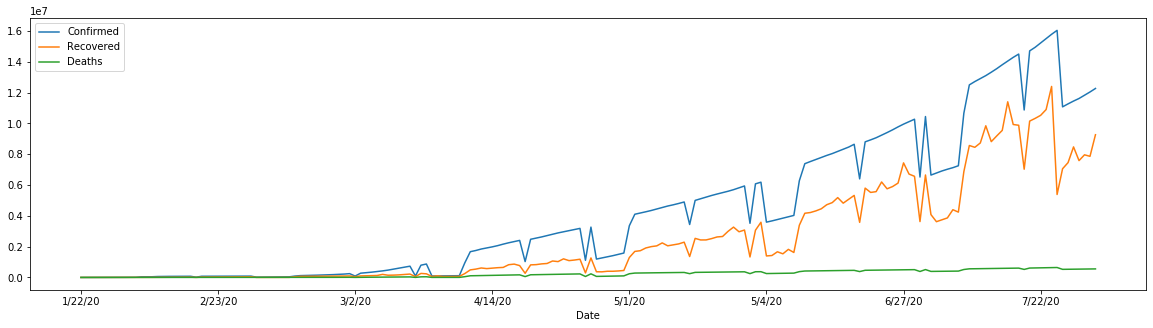

In [19]:
df_per_day.plot(kind='line',figsize=(20,5))

# As you can see below you can see linear type relation between Recovery,  Deaths and Confirmed cases 

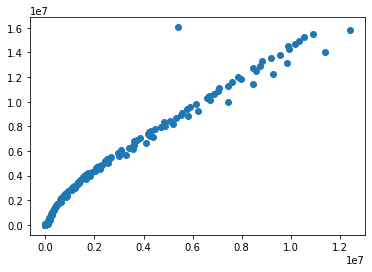

In [20]:
plt.scatter(df_per_day['Recovered'],df_per_day['Confirmed'])

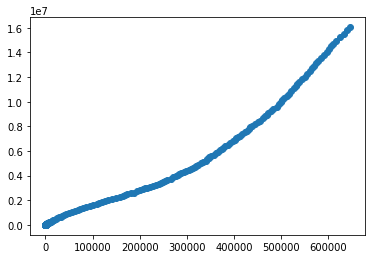

In [21]:
plt.scatter(df_per_day['Deaths'],df_per_day['Confirmed'])

## Deciding to do Linear Regression

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df_per_day.columns

Index(['Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [24]:
x=df_per_day[['Recovered', 'Deaths']]

In [25]:
y=df_per_day['Confirmed']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm=LinearRegression()

In [29]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lm.score(x_test,y_test)

0.997037938358408

In [31]:
ypred=lm.predict(x_test)

In [32]:
ypred

array([ 5.34956296e+06,  1.27092913e+07,  1.50886628e+07,  4.25177583e+06,
        3.48423531e+06,  2.68664553e+04,  1.63152952e+07,  5.24393074e+03,
        6.24071320e+06,  1.03633173e+07,  4.22526152e+04,  1.95052787e+06,
        6.92820634e+06,  5.97131404e+06,  8.82240938e+04,  2.47146292e+04,
        3.60306836e+06,  6.02444638e+04,  8.17480126e+06,  3.20795189e+04,
        1.84353711e+06,  5.51404719e+06,  3.77966258e+06,  9.49274978e+06,
        9.17747744e+04, -4.50897138e+02,  3.99054864e+06,  8.31699467e+06,
        2.90145019e+04,  1.36232636e+07,  1.50752079e+07,  1.39938556e+07,
        1.07435289e+05,  3.58919030e+06,  1.29135038e+05,  8.39287585e+04,
        1.07057647e+07,  5.73393574e+04])

In [33]:
x_test

,Recovered,Deaths
Date,,
5/21/20,2434427.0,334128
7/12/20,8734247.0,569008
7/17/20,11407639.0,596519
5/10/20,1691193.0,284151
5/1/20,1293973.0,239897
2/14/20,17905.0,1523
7/24/20,12405027.0,639666
2/6/20,2012.0,634
5/27/20,3268676.0,357135


In [34]:
x_test['y_pred']=ypred

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
x_test

,Recovered,Deaths,y_pred
Date,,,
5/21/20,2434427.0,334128,5.349563e+06
7/12/20,8734247.0,569008,1.270929e+07
7/17/20,11407639.0,596519,1.508866e+07
5/10/20,1691193.0,284151,4.251776e+06
5/1/20,1293973.0,239897,3.484235e+06
2/14/20,17905.0,1523,2.686646e+04
7/24/20,12405027.0,639666,1.631530e+07
2/6/20,2012.0,634,5.243931e+03
5/27/20,3268676.0,357135,6.240713e+06


In [36]:
x_test['y_actual']=y_test

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
x_test

,Recovered,Deaths,y_pred,y_actual
Date,,,,
5/21/20,2434427.0,334128,5.349563e+06,5110805
7/12/20,8734247.0,569008,1.270929e+07,12915161
7/17/20,11407639.0,596519,1.508866e+07,14055307
5/10/20,1691193.0,284151,4.251776e+06,4104768
5/1/20,1293973.0,239897,3.484235e+06,3356663
2/14/20,17905.0,1523,2.686646e+04,66908
7/24/20,12405027.0,639666,1.631530e+07,15792390
2/6/20,2012.0,634,5.243931e+03,30802
5/27/20,3268676.0,357135,6.240713e+06,5700405


## Removing Mean Squared Error and Root Mean Squared Error

In [38]:
 from sklearn.metrics import mean_squared_error

In [39]:
mse=mean_squared_error(y_test,ypred)

In [40]:
rmse=np.sqrt(mse)

# Converting decimal values to integer values and exponential numbers were difficult to read for human interpretation

In [41]:
x_test['y_pred']=x_test['y_pred'].apply(np.ceil)


C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
x_test

,Recovered,Deaths,y_pred,y_actual
Date,,,,
5/21/20,2434427.0,334128,5349563.0,5110805
7/12/20,8734247.0,569008,12709292.0,12915161
7/17/20,11407639.0,596519,15088663.0,14055307
5/10/20,1691193.0,284151,4251776.0,4104768
5/1/20,1293973.0,239897,3484236.0,3356663
2/14/20,17905.0,1523,26867.0,66908
7/24/20,12405027.0,639666,16315296.0,15792390
2/6/20,2012.0,634,5244.0,30802
5/27/20,3268676.0,357135,6240714.0,5700405


# Final comparison table
## Some values are unreasonable I tried to remove but ended up not being able to

In [43]:
x_test[['y_pred','y_actual']]

,y_pred,y_actual
Date,,
5/21/20,5349563.0,5110805
7/12/20,12709292.0,12915161
7/17/20,15088663.0,14055307
5/10/20,4251776.0,4104768
5/1/20,3484236.0,3356663
2/14/20,26867.0,66908
7/24/20,16315296.0,15792390
2/6/20,5244.0,30802
5/27/20,6240714.0,5700405


# Thankyou for your guidance and time